In [15]:
import os
import numpy as np
from Bin_Helpers import *
from scipy.stats import chi2
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('des_dr1')

In [16]:
ind = 0 # The binning index to use.
surveys = ['ACT', 'Planck', 'SPT', 'SO']

# Cross $C_\ell$'s

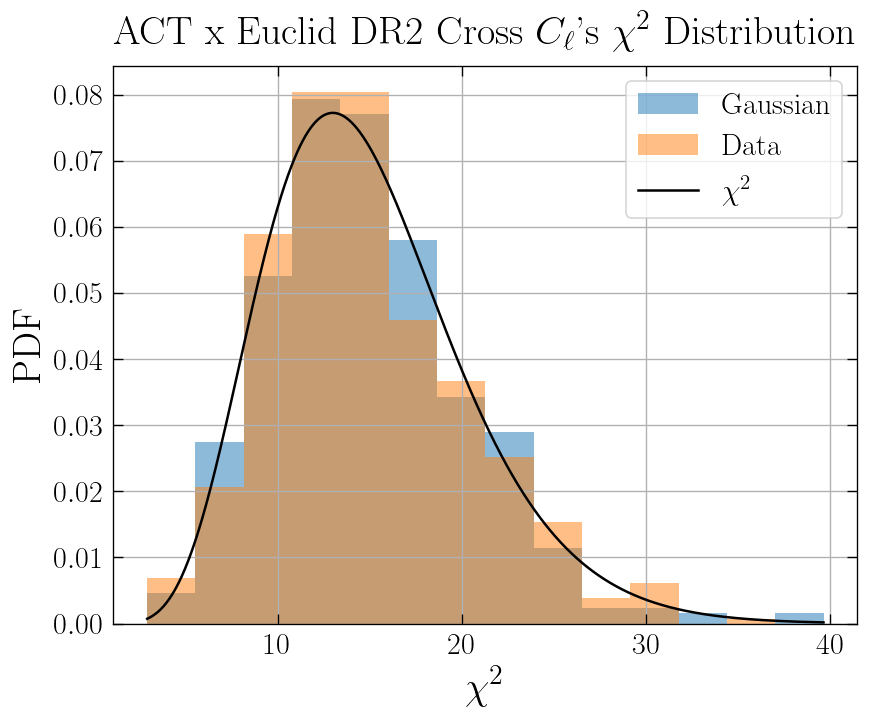

In [18]:
df = 15

survey_ind = 0
s = surveys[survey_ind]
survey = s + '_x_dr3'

nside = 1024
lmin = 2
lmax = 3072 # Must be 3072 or less
data_len = (lmax-lmin) * 2 # Two tomographic bins
numBins = df

piv_dir = '/n/home09/kboone/software/Half_Data/Splits_Data/Cross/'

piv_file = piv_dir+'Cl_100_'+survey+'.npy'
pivots = np.load(piv_file)[ind]

fid_split_file = piv_dir+'Fid_Splits.npy'
fid_split = ~np.load(fid_split_file)[ind]

fid_dir = '/n/netscratch/dvorkin_lab/Lab/kboone/cmb_x_wl/raw_cross_cls/'

all_files = np.array(os.listdir(fid_dir))
fid_inds = [i for i, s in enumerate(all_files) if s.startswith('f')]
all_fid_files = all_files[fid_inds]

all_fid = np.zeros((len(all_fid_files), data_len), dtype = np.float64)
for i in np.arange(len(all_fid)):
    all_fid[i] = np.append(np.load(fid_dir + all_fid_files[i], allow_pickle=True).item()[survey+'_low_z'][lmin:lmax], 
                           np.load(fid_dir + all_fid_files[i], allow_pickle=True).item()[survey+'_high_z'][lmin:lmax])
    
Q = create_linlin_matrix(data_len, numBins, points=pivots)

fid = all_fid[fid_split] @ Q
ave = np.average(fid, axis=0)
C = np.cov(fid, rowvar=False)
C_inv = np.linalg.inv(C)

sim_fid = np.random.multivariate_normal(ave, C, len(fid))
ave_sim = np.average(sim_fid, axis=0)
C_sim = np.cov(sim_fid, rowvar=False)
C_inv_sim = np.linalg.inv(C_sim)

chi2_fid = np.diag((fid - ave) @ C_inv @ (fid - ave).T)
chi2_sim = np.diag((sim_fid - ave_sim) @ C_inv_sim @ (sim_fid - ave_sim).T)

x = np.linspace(np.min(chi2_sim), np.max(chi2_sim), 1000)
plt.figure(dpi = 120)
plt.hist(chi2_sim, density=True, alpha=0.5, label='Gaussian', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
plt.hist(chi2_fid, density=True, alpha=0.5, label='Data', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
plt.plot(x, chi2.pdf(x, df), color='k', label=r'$\chi^2$')
# plt.grid()
plt.legend(fontsize=18)
plt.xlabel(r'$\chi^2$', fontsize=24)
plt.ylabel('PDF', fontsize=24)
plt.title(s + r' x Euclid DR2 Cross $C_\ell$'+'\'s'+r' $\chi^2$ Distribution', fontsize=24, y=1.02)
plt.show()

In [19]:
# x = np.linspace(np.min(chi2_sim), np.max(chi2_sim), 1000)
# plt.figure(dpi = 120)
# plt.hist(chi2_sim, density=True, alpha=0.5, label='Gaussian', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
# plt.hist(chi2_fid, density=True, alpha=0.5, label='Data', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
# plt.plot(x, chi2.pdf(x, df), color='k', label=r'$\chi^2$')
# # plt.grid()
# plt.legend(fontsize=18)
# plt.xlabel(r'$\chi^2$',fontsize=24)
# plt.ylabel('PDF',fontsize=24)
# plt.title(s + r' x Euclid DR2 Cross $C_\ell$'+'\'s'+r' $\chi^2$ Distribution', fontsize=24, y=1.02)
# plt.savefig('../Paper_Plots/CRO_Chi2.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
#               pad_inches=0.02)
# plt.close()

In [5]:
len(np.where(chi2_fid > np.max(chi2_sim))[0])

1

# WPH

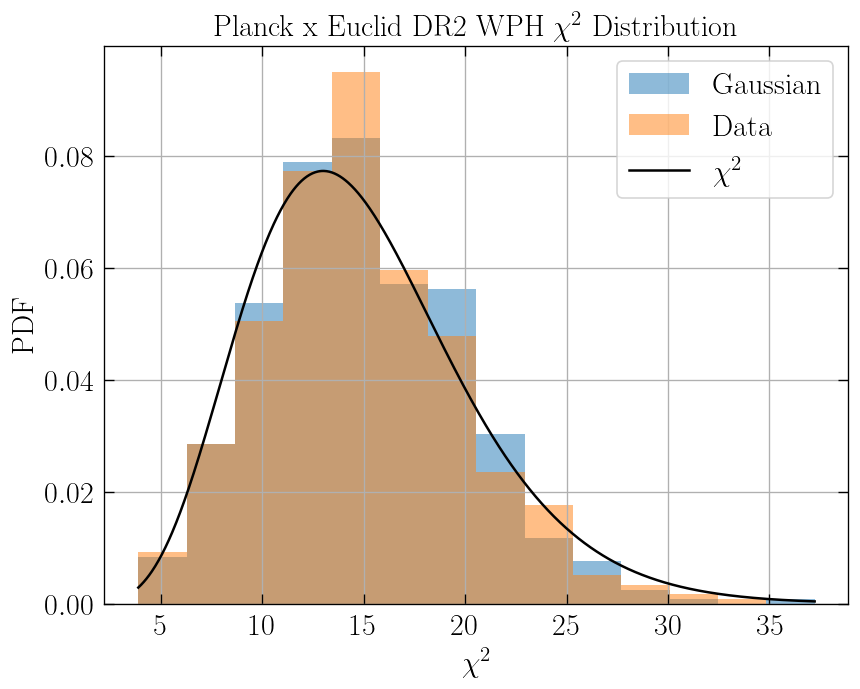

In [22]:
df = 15

survey_ind = 1
s = surveys[survey_ind]
survey = s + '_x_dr3'

data_len = 392
numBins = df

sortInds = np.load('/n/home09/kboone/software/Data/MCMC_Sorting/WPH_J7_L4_Inds.npy')

piv_dir = '/n/home09/kboone/software/Half_Data/Splits_Data/Cross/'

piv_file = piv_dir+'WPH_100_'+survey+'.npy'
pivots = np.load(piv_file)[ind]

fid_split_file = piv_dir+'Fid_Splits.npy'
fid_split = ~np.load(fid_split_file)[ind]

fid_dir = '/n/netscratch/dvorkin_lab/Lab/kboone/cmb_x_wl/'+survey+'_wph_j7_l4/'

all_files = np.array(os.listdir(fid_dir))
fid_inds = [i for i, s in enumerate(all_files) if s.startswith('f')]
all_fid_files = all_files[fid_inds]

all_fid = np.zeros((len(all_fid_files), data_len), dtype = np.float64)
for i in np.arange(len(all_fid)):
    all_fid[i] = (np.load(fid_dir + all_fid_files[i], allow_pickle=True)[:data_len].real)[sortInds]
    
Q = create_linlin_matrix(data_len, numBins, points=pivots)

fid = all_fid[fid_split] @ Q
ave = np.average(fid, axis=0)
C = np.cov(fid, rowvar=False)
C_inv = np.linalg.inv(C)

sim_fid = np.random.multivariate_normal(ave, C, len(fid))
ave_sim = np.average(sim_fid, axis=0)
C_sim = np.cov(sim_fid, rowvar=False)
C_inv_sim = np.linalg.inv(C_sim)

chi2_fid = np.diag((fid - ave) @ C_inv @ (fid - ave).T)
chi2_sim = np.diag((sim_fid - ave_sim) @ C_inv_sim @ (sim_fid - ave_sim).T)

x = np.linspace(np.min(chi2_sim), np.max(chi2_sim), 1000)
plt.figure(dpi = 120)
plt.hist(chi2_sim, density=True, alpha=0.5, label='Gaussian', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
plt.hist(chi2_fid, density=True, alpha=0.5, label='Data', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
plt.plot(x, chi2.pdf(x, df), color='k', label=r'$\chi^2$')
plt.grid()
plt.legend()
plt.xlabel(r'$\chi^2$')
plt.ylabel('PDF')
plt.title(s + r' x Euclid DR2 WPH $\chi^2$ Distribution')
plt.show()

In [24]:
# x = np.linspace(np.min(chi2_sim), np.max(chi2_sim), 1000)
# plt.figure(dpi = 120)
# plt.hist(chi2_sim, density=True, alpha=0.5, label='Gaussian', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
# plt.hist(chi2_fid, density=True, alpha=0.5, label='Data', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
# plt.plot(x, chi2.pdf(x, df), color='k', label=r'$\chi^2$')
# # plt.grid()
# plt.legend(fontsize=18)
# plt.xlabel(r'$\chi^2$',fontsize=24)
# plt.ylabel('PDF',fontsize=24)
# plt.title(s + r' x Euclid DR2 WPH $\chi^2$ Distribution',fontsize=24,y=1.02)
# plt.savefig('../Paper_Plots/WPH_Chi2.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
#               pad_inches=0.02)
# plt.close()

In [8]:
len(np.where(chi2_fid > np.max(chi2_sim))[0])

0

# $C_\ell$'s

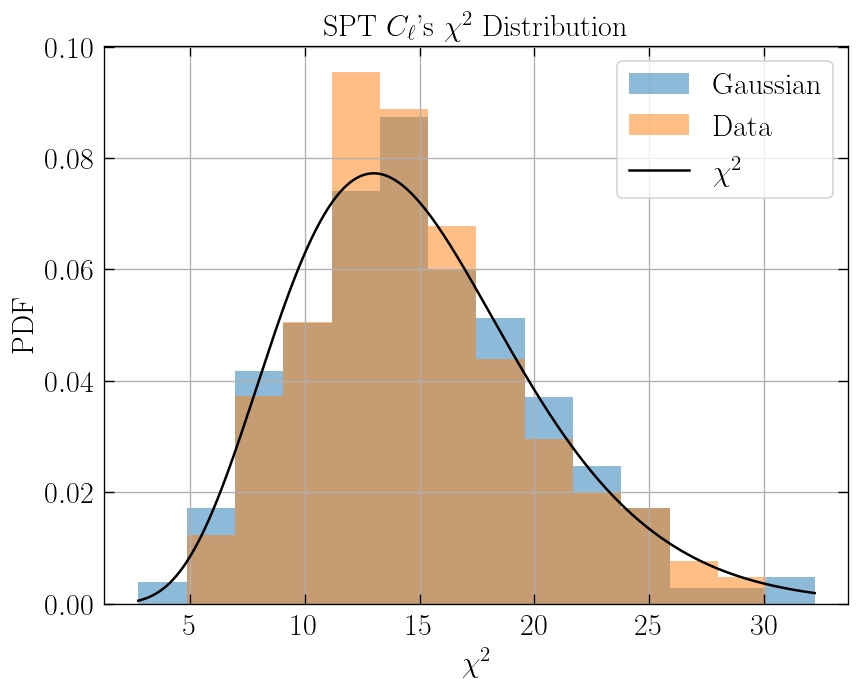

In [25]:
df = 15

survey_ind = 2
survey = surveys[survey_ind]

nside = 1024
lmin = 2
lmax = 3072 # Must be 3072 or less
data_len = (lmax-lmin)
numBins = df

piv_dir = '/n/home09/kboone/software/Half_Data/Splits_Data/CMBL/'

piv_file = piv_dir+'Cl_100_'+survey+'.npy'
pivots = np.load(piv_file)[ind]

fid_split_file = piv_dir+'Fid_Splits.npy'
fid_split = ~np.load(fid_split_file)[ind]

fid_dir = '/n/netscratch/dvorkin_lab/Lab/kboone/cmb_conv/cls/'

all_files = np.array(os.listdir(fid_dir))
fid_inds = [i for i, s in enumerate(all_files) if s.startswith('f')]
all_fid_files = all_files[fid_inds]

all_fid = np.zeros((len(all_fid_files), data_len), dtype = np.float64)
for i in np.arange(len(all_fid)):
    all_fid[i] = np.load(fid_dir + all_fid_files[i], allow_pickle=True).item()[survey][lmin:lmax]
    
Q = create_linlin_matrix(data_len, numBins, points=pivots)

fid = all_fid[fid_split] @ Q
ave = np.average(fid, axis=0)
C = np.cov(fid, rowvar=False)
C_inv = np.linalg.inv(C)

sim_fid = np.random.multivariate_normal(ave, C, len(fid))
ave_sim = np.average(sim_fid, axis=0)
C_sim = np.cov(sim_fid, rowvar=False)
C_inv_sim = np.linalg.inv(C_sim)

chi2_fid = np.diag((fid - ave) @ C_inv @ (fid - ave).T)
chi2_sim = np.diag((sim_fid - ave_sim) @ C_inv_sim @ (sim_fid - ave_sim).T)

x = np.linspace(np.min(chi2_sim), np.max(chi2_sim), 1000)
plt.figure(dpi = 120)
plt.hist(chi2_sim, density=True, alpha=0.5, label='Gaussian', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
plt.hist(chi2_fid, density=True, alpha=0.5, label='Data', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
plt.plot(x, chi2.pdf(x, df), color='k', label=r'$\chi^2$')
plt.grid()
plt.legend()
plt.xlabel(r'$\chi^2$')
plt.ylabel('PDF')
plt.title(survey + r' $C_\ell$'+'\'s'+r' $\chi^2$ Distribution')
plt.show()

In [27]:
# x = np.linspace(np.min(chi2_sim), np.max(chi2_sim), 1000)
# plt.figure(dpi = 120)
# plt.hist(chi2_sim, density=True, alpha=0.5, label='Gaussian', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
# plt.hist(chi2_fid, density=True, alpha=0.5, label='Data', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
# plt.plot(x, chi2.pdf(x, df), color='k', label=r'$\chi^2$')
# # plt.grid()
# plt.legend(fontsize=18)
# plt.xlabel(r'$\chi^2$',fontsize=24)
# plt.ylabel('PDF',fontsize=24)
# plt.title(survey + r' $C_\ell$'+'\'s'+r' $\chi^2$ Distribution',fontsize=24,y=1.02)
# plt.savefig('../Paper_Plots/CLS_Chi2.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
#               pad_inches=0.02)
# plt.close()

In [28]:
fid_dir = '/n/netscratch/dvorkin_lab/Lab/kboone/cmb_conv/wst_numS50_L4/'

# WST

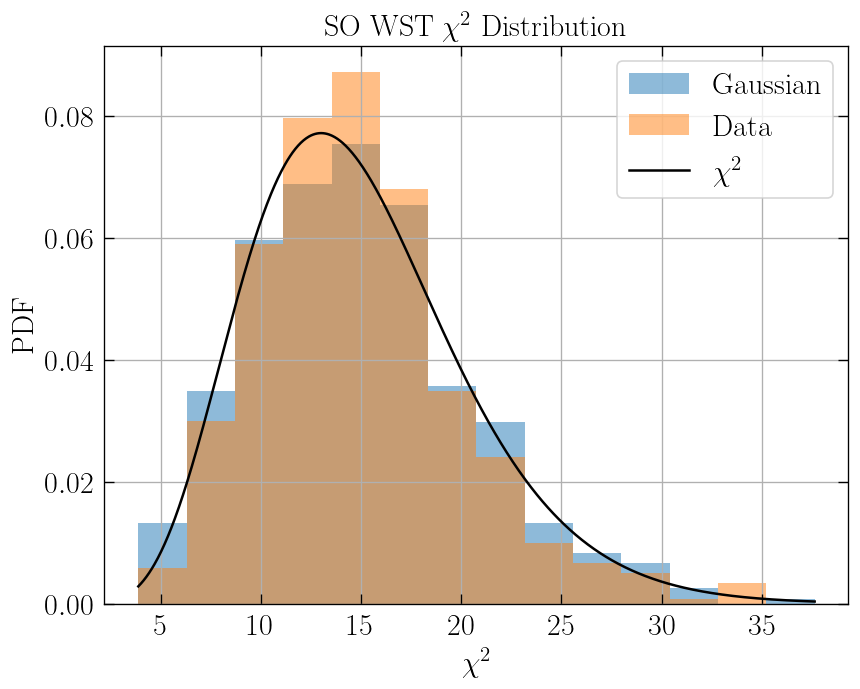

In [29]:
df = 15
survey_ind = 3
survey = surveys[survey_ind]

data_len = 5150
numBins = df

sortInds = np.load('/n/home09/kboone/software/Data/MCMC_Sorting/WST_S50_L4_Inds.npy')

piv_dir = '/n/home09/kboone/software/Half_Data/Splits_Data/CMBL/'

piv_file = piv_dir+'WST_100_'+survey+'.npy'
pivots = np.load(piv_file)[ind]

fid_split_file = piv_dir+'Fid_Splits.npy'
fid_split = ~np.load(fid_split_file)[ind]

fid_dir = '/n/netscratch/dvorkin_lab/Lab/kboone/cmb_conv/wst_numS50_L4/'

all_files = np.array(os.listdir(fid_dir))
fid_inds = [i for i, s in enumerate(all_files) if s.startswith('f')]
all_fid_files = all_files[fid_inds]

all_fid = np.zeros((len(all_fid_files), data_len), dtype = np.float64)
for i in np.arange(len(all_fid)):
    all_fid[i] = (np.load(fid_dir + all_fid_files[i], allow_pickle=True).item()[survey][:data_len])[sortInds]
    
Q = create_linlin_matrix(data_len, numBins, points=pivots)

fid = all_fid[fid_split] @ Q
ave = np.average(fid, axis=0)
C = np.cov(fid, rowvar=False)
C_inv = np.linalg.inv(C)

sim_fid = np.random.multivariate_normal(ave, C, len(fid))
ave_sim = np.average(sim_fid, axis=0)
C_sim = np.cov(sim_fid, rowvar=False)
C_inv_sim = np.linalg.inv(C_sim)

chi2_fid = np.diag((fid - ave) @ C_inv @ (fid - ave).T)
chi2_sim = np.diag((sim_fid - ave_sim) @ C_inv_sim @ (sim_fid - ave_sim).T)

x = np.linspace(np.min(chi2_sim), np.max(chi2_sim), 1000)
plt.figure(dpi = 120)
plt.hist(chi2_sim, density=True, alpha=0.5, label='Gaussian', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
plt.hist(chi2_fid, density=True, alpha=0.5, label='Data', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
plt.plot(x, chi2.pdf(x, df), color='k', label=r'$\chi^2$')
plt.grid()
plt.legend()
plt.xlabel(r'$\chi^2$')
plt.ylabel('PDF')
plt.title(survey + r' WST $\chi^2$ Distribution')
plt.show()

In [30]:
# x = np.linspace(np.min(chi2_sim), np.max(chi2_sim), 1000)
# plt.figure(dpi = 120)
# plt.hist(chi2_sim, density=True, alpha=0.5, label='Gaussian', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
# plt.hist(chi2_fid, density=True, alpha=0.5, label='Data', bins=np.linspace(np.min(chi2_sim), np.max(chi2_sim), 15))
# plt.plot(x, chi2.pdf(x, df), color='k', label=r'$\chi^2$')
# # plt.grid()
# plt.legend(fontsize=18)
# plt.xlabel(r'$\chi^2$',fontsize=24)
# plt.ylabel('PDF',fontsize=24)
# plt.title(survey + r' WST $\chi^2$ Distribution',fontsize=24,y=1.02)
# plt.savefig('../Paper_Plots/WST_Chi2.pdf', format='pdf', bbox_inches='tight',  # include everything that sticks out
#               pad_inches=0.02)
# plt.close()

In [14]:
len(np.where(chi2_fid > np.max(chi2_sim))[0])

2